<a href="https://colab.research.google.com/github/Wlly1618/Server-Arduino/blob/main/VentaCasaHouston01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Precios de la vivienda en Boston**

  CRIM tasa de criminalidad per cápita por ciudad
  
  ZN Proporción de suelo residencial zonificado para lotes de más de 25,000 pies cuadrados.
  
  INDUS Proporción de acres comerciales no minoristas por ciudad
  
  CHAS Charles River variable ficticia (= 1 si el tramo limita con el río; 0 en caso contrario)
  
  NOX Concentración de óxidos nítricos (partes por 10 millones)
  
  RM promedio de cuartos por vivienda
  
  EDAD proporción de unidades ocupadas por propietarios construidas antes de 1940
  
  DIS Distancias ponderadas a 5 centros de empleo de Boston
  
  RAD Índice de accesibilidad a carreteras radiales
  
  TAX Tasa de impuesto a la propiedad de valor total por cada $10,000
  
  PTRATIO ratio alumno-profesor por localidad
  
  B 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad
  
  LSTAT % estado inferior de la población
  
  MEDV Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Url de donde levantar el dataset Boston
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Variable "raw_df" almacena el cvs, saltando 22 lineas
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# vector "features_name" almacena nombre de cada columna
features_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# data alamcena con hstack los datos en fila y columnas
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])

# target alamcena la variable objetivo
target = raw_df.values[1::2, 2]

# visualizamos data y target
data, target

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 1

In [ ]:
x = pd.DataFrame(data, columns=features_name)


In [ ]:
y = pd.DataFrame(target, columns=["MDEV"])
# uso data frame en x e y, para mostrar de otra forma
#cad uno se muestra ensu columna

In [ ]:
x, y

(        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
 1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
 2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
 3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
 4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
 ..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
 501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
 502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
 503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
 504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
 505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   
 
      PTRATIO       B  LSTAT  
 0       15.3  396.90   4.98  
 1       17.8  396.90   

In [ ]:
x.keys(), y.keys()
# para hacer analisis exploratorio de datos hay que analizar cada columna
# entonces la vble KEYS nombres de cada columna

(Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT'],
       dtype='object'),
 Index(['MDEV'], dtype='object'))

In [ ]:
x.shape, y.shape
#esta vble shape muestras CUANTAS OBSERVACIONES  tiene el Dataset
# cuantas filas y columnas


((506, 13), (506, 1))

X tiene 506 filas, 10 columnas
Y tiene 475 filas, 1 columna  

In [ ]:
x.head(5)
# head muestra como son las datos y el numero indica cunatas observaciones se peuden mostrar

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
x.info()
# INFO muestra cuales son los TIPOS de valores (float eneste caso)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
x.describe()
# DESCRIBE me da COUNT la cantidad de valores por columna (fila no seria?)
# CRIM dice 506 en count, todas deberian decir 506
# si dice 458 quiere decir que estan faltando columnas!!
# puede ser porque sea un SQL no estructurado, cuidado
# MEAN es la media. STD es valor estandar. MIN es valor minimo
# 25% es cuartil inferior. 75% es cuartil superior. MAX valor maximo


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


esta tabla son todos valores estadisticos, en este caso todos son numeros

In [ ]:
x.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
x.describe(include='all').T
# muestra todas las columnas, y los valores estadisticos transpuestos

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


CRIM tiene media=3.61 pero el valor maximo=88.97 muy alejado de la media. El valor minimo= 0.006. En los cuartiles vemos que el 75% de los valores se encuentran en 75%=3.67; hay que tratar esos datso de otra manera

In [ ]:
#y


In [ ]:
#x.isnull().values.any()

In [ ]:
#x.isnull().sum()

Mostaremos el valor de la vivienda en forma de histograma. Y es la variable target.

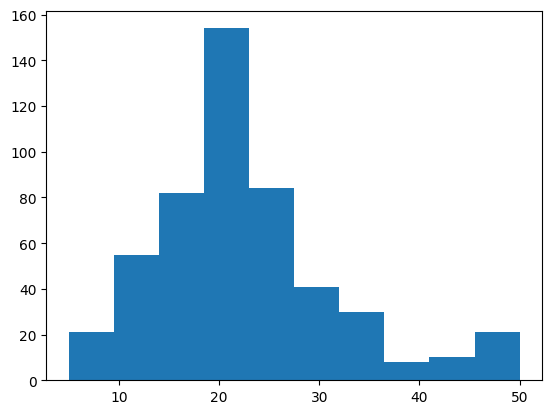

In [ ]:
plt.hist(y)
plt.show()

En esta relacion se observa una distribucion normal, pero hay una concentracion hacia la derecha. Todos los valores de 0 a 10 hay 20. Los valores de 10 a 20 son tantos, se ve la densidad de los valores. Cambiamos el bins para acortar o alragr la muestra, fragmentando los valores para observar mejor la densidad. Asi vemos si se comporta como un dist normal. A partir de 40 vuelve a subir, prestar atencion a eso

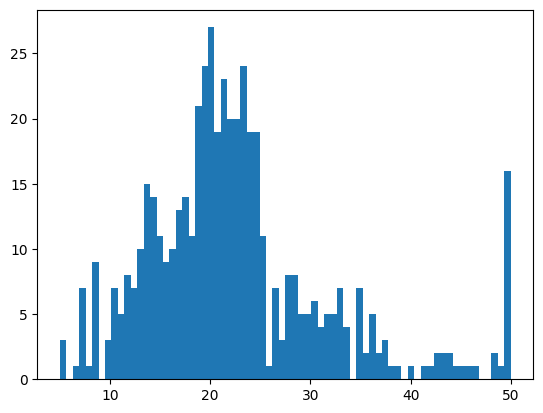

In [ ]:
plt.hist(y, bins = 70)
plt.show()

<Figure size 640x480 with 0 Axes>

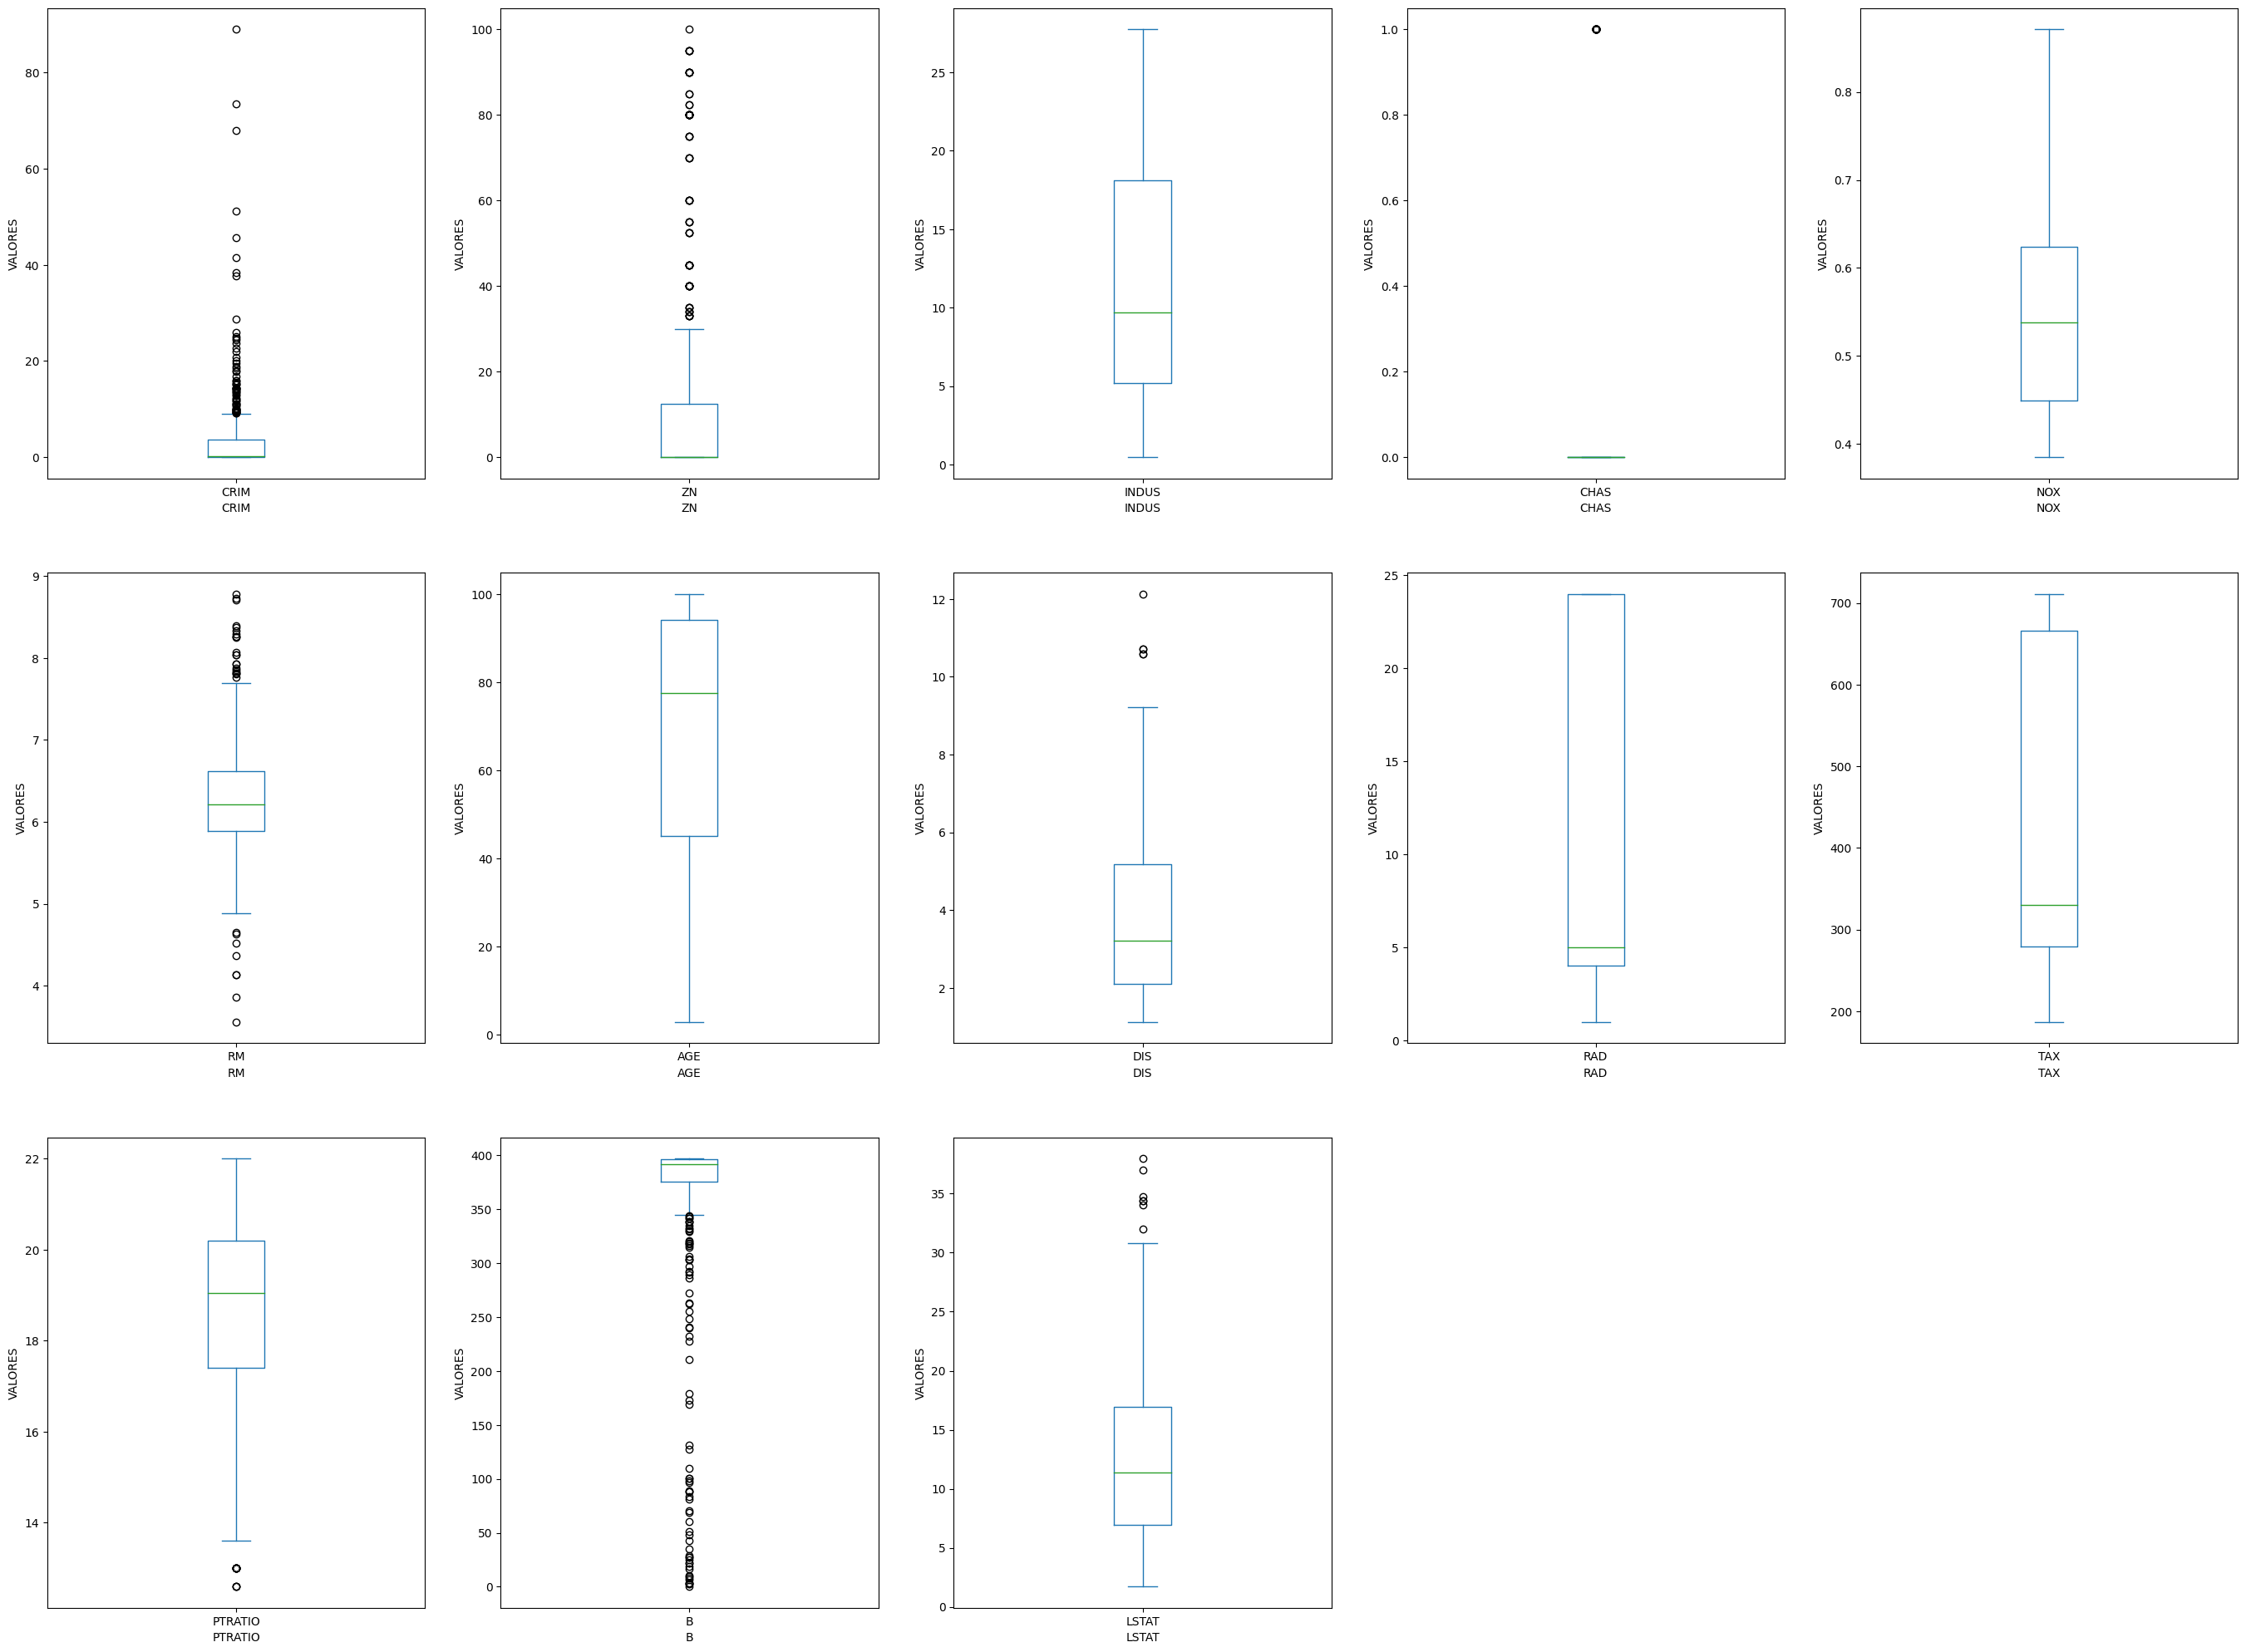

In [ ]:
fig = plt.figure()
# empezamos a analizar la vbles independientes
# veremos si hay un patron
# fig es un cuadro y defino la medida de ese cuadro
fig = plt.figure(figsize=(34,25))
for i in range(len(features_name)):
  var_i = features_name[i]
  sub = fig.add_subplot(3,5,i+1)
  # dentro del cuadro fig, se dibuja en 3,5 y entre espacio de i+1
  sub.set_xlabel(var_i)
  sub.set_ylabel("VALORES")
  x[var_i].plot(kind='box')
plt.show()

Diagramas de caja: muestra la distribución de datos para una variable continua.
Ayudan a ver el centro y la extensión de los datos. Ayuda a comprobar la normalidad o identificar posibles valores atípicos.
Buscar valores extremos de sus datos, cuidado si el conjunto de datos es reducido. Si hay variables categóricas o nominales, usar diagrama de barras.

Como vemos que algunos tiene problemas hacemos un segundo analisis con histogramas

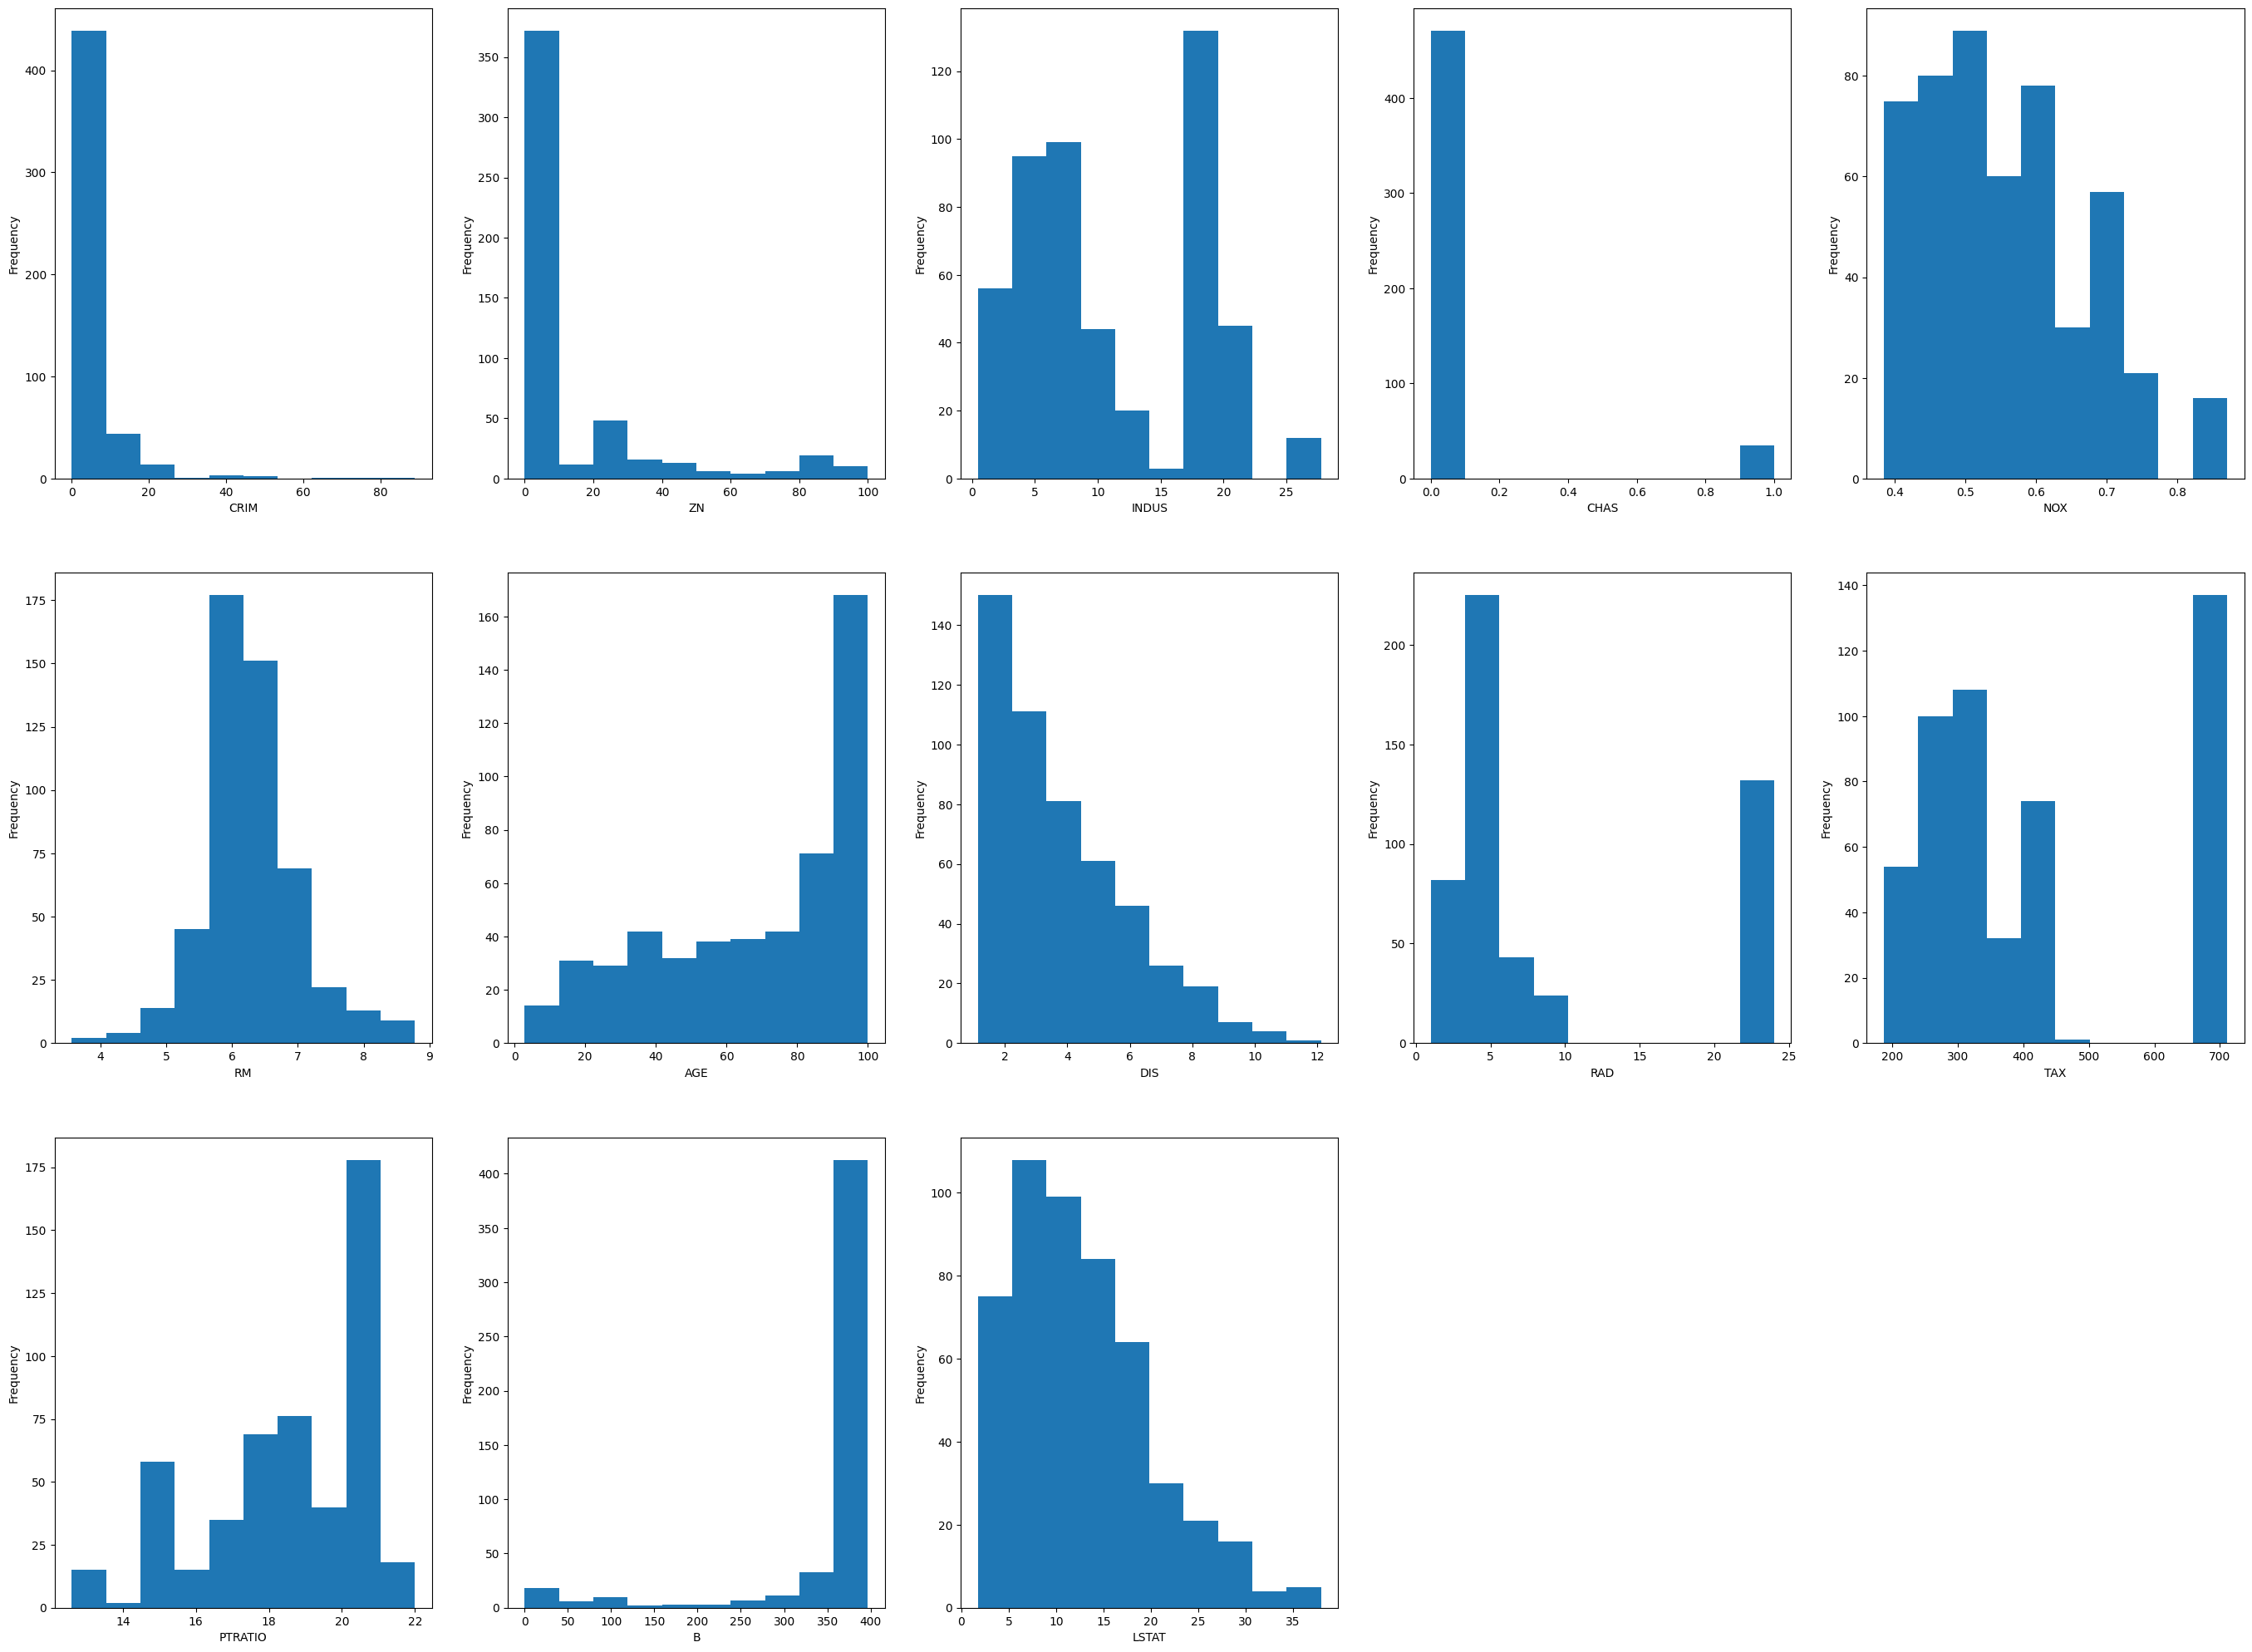

In [ ]:
# vemos en lso histogramas cual es la distribucion que puede existir
fig = plt.figure(figsize=(34,25))
for i in range(len(features_name)):
  var_i = features_name[i]
  sub = fig.add_subplot(3,5,i+1)
  # dentro del cuadro fig, se dibuja en 3,5 y entre espacio de i+1
  sub.set_xlabel(var_i)
  sub.set_ylabel("VALORES")
  x[var_i].plot(kind='hist')
plt.show()

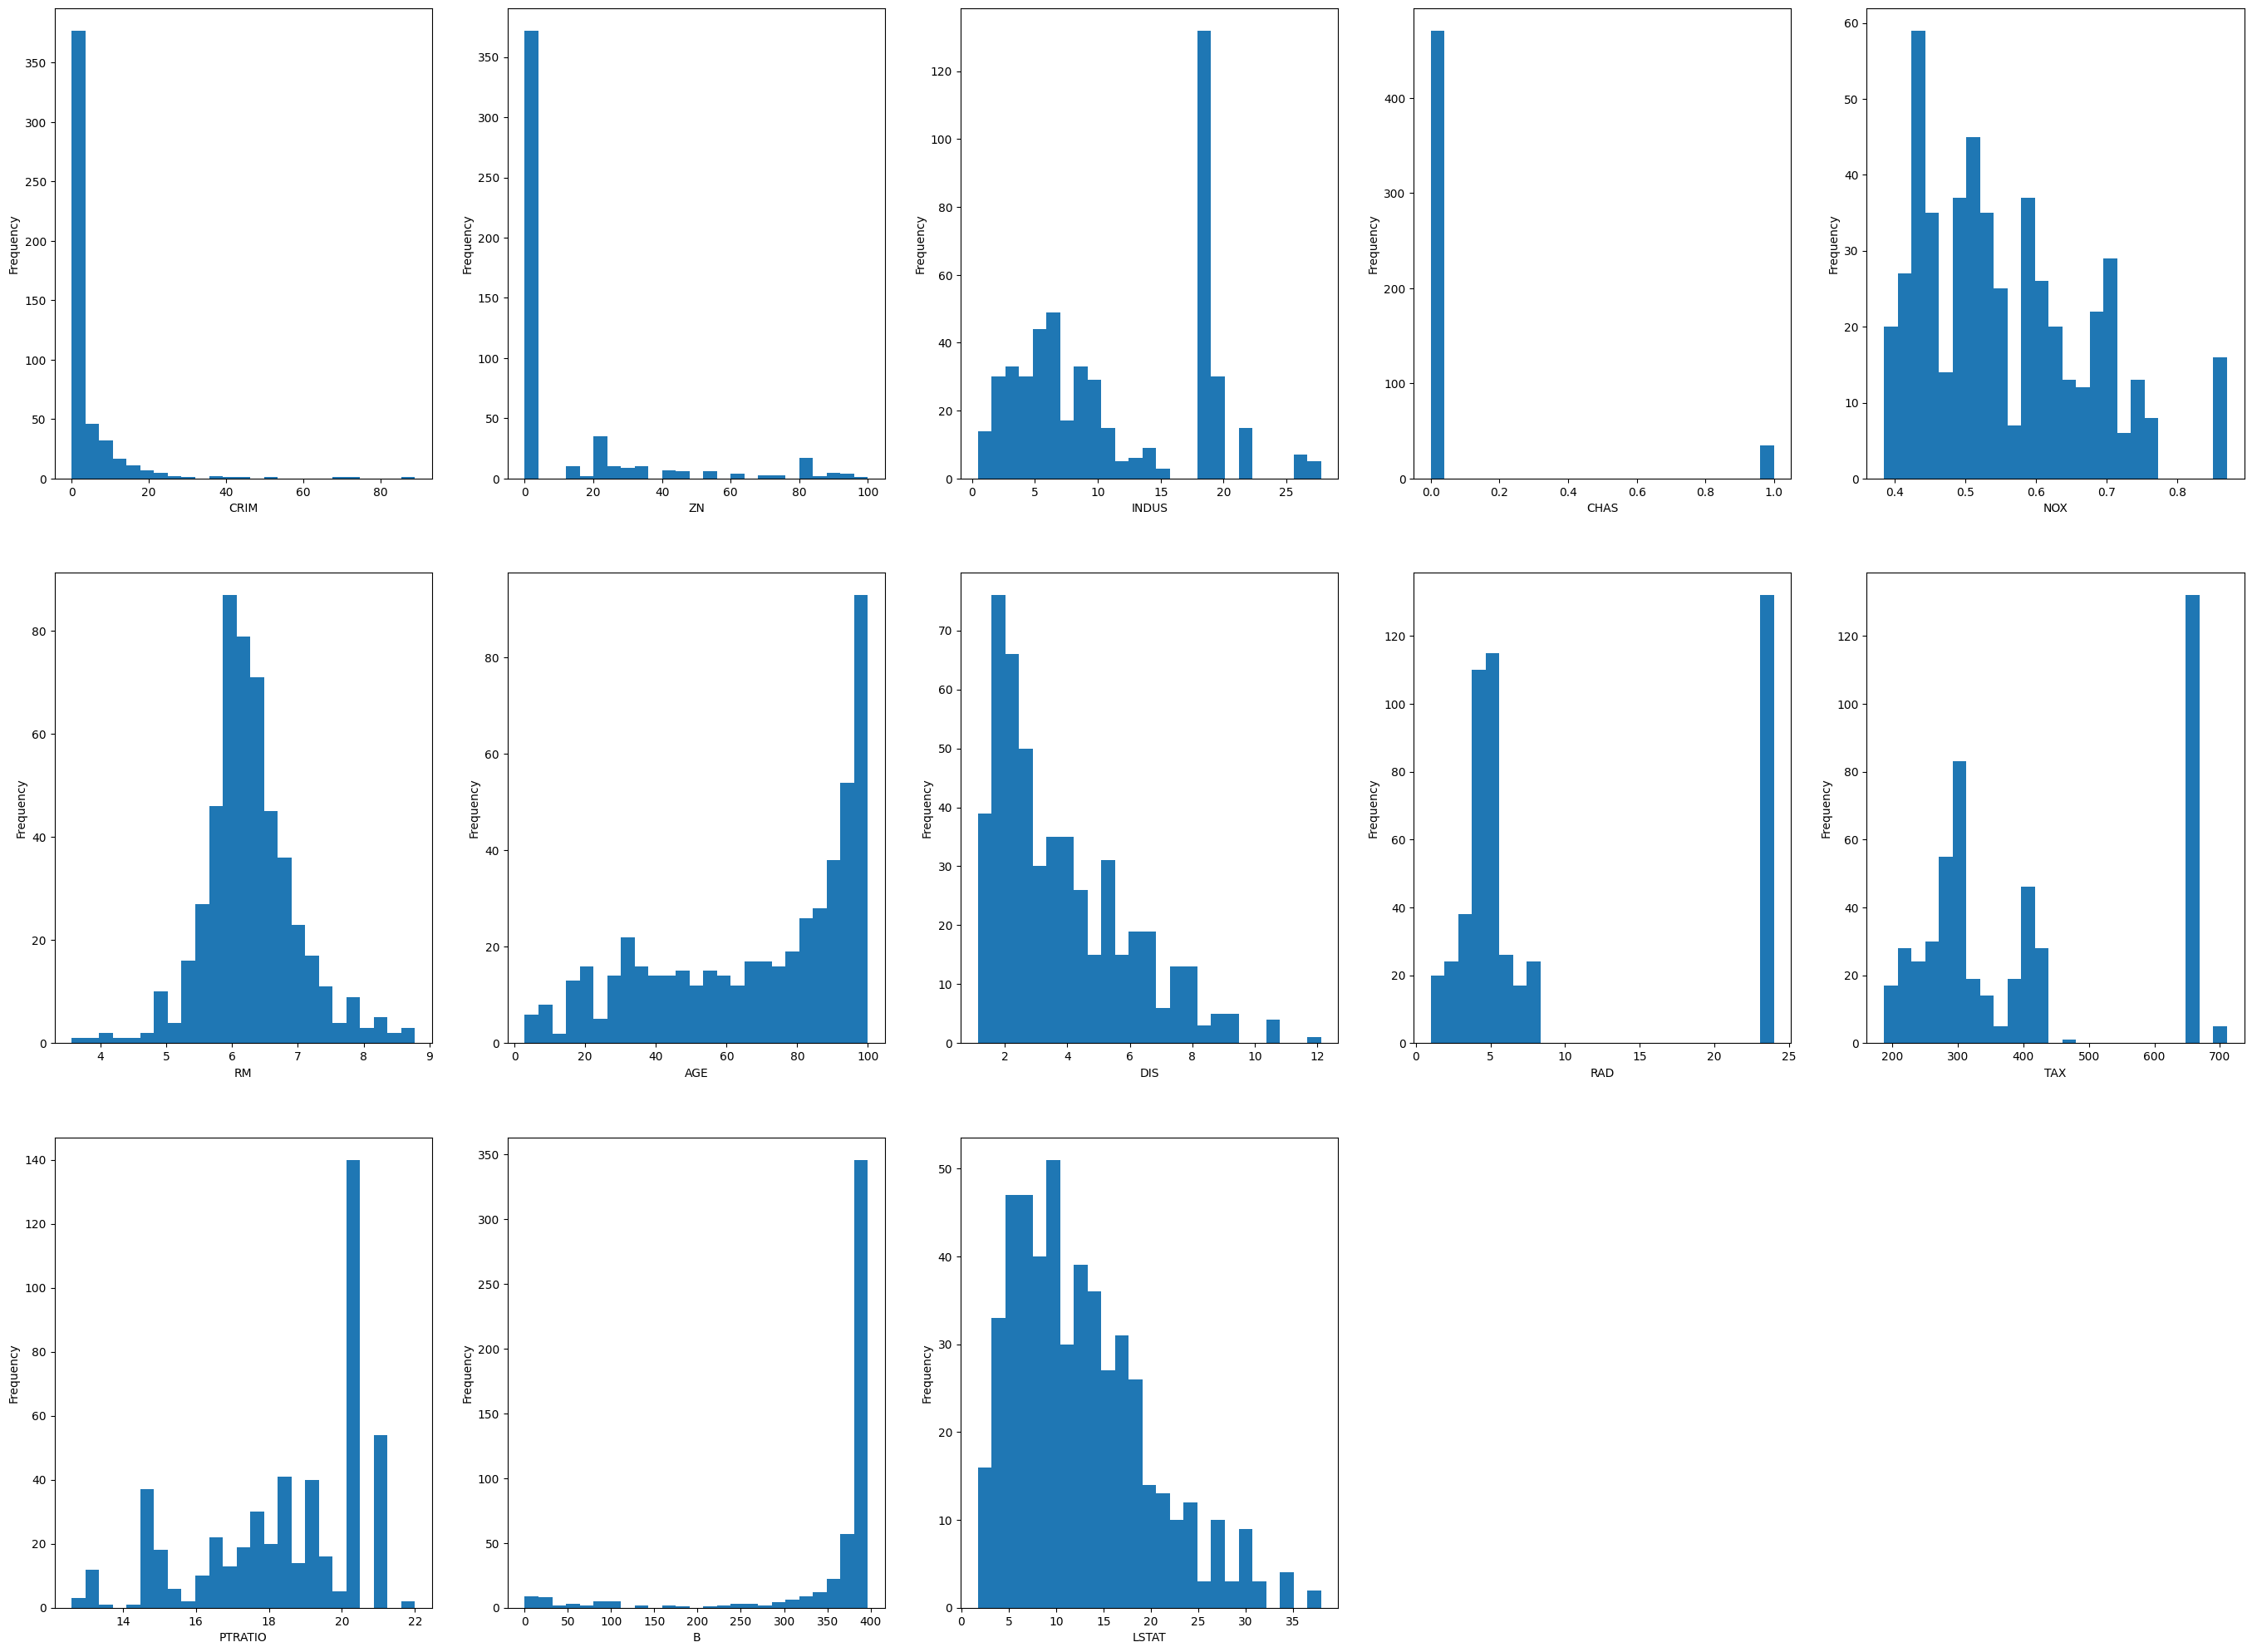

In [ ]:
# Agregamos el bins para ver mejor el comportamiento de los datos
fig = plt.figure(figsize=(34,25))
for i in range(len(features_name)):
  var_i = features_name[i]
  sub = fig.add_subplot(3,5,i+1)
  sub.set_xlabel(var_i)
  sub.set_ylabel("VALORES")
  x[var_i].plot(kind='hist', bins = 25)
plt.show()

Ahora con estas graficas ya se que estan pasando con los datos, ahora quiero tratar d epredecir precir.
Para analizar las vbles independientes, se realiza a traves de la correlacion.
SE UNE CON PANDA CONCAT, concateno la var dependiente  y la independiente

In [ ]:
df_test = pd.concat((x,y), axis =1)

correlaciones = df_test.corr()
correlaciones.style.background_gradient(cmap='coolwarm')
#correlaciones['AGE'>50]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


Dificilmente exista colinealidad pero hay que ver, si analizar CRIM respecto de las otras variables, luego ZN, etc.
Ahora lo que sigue es hacer el remuestreo de los datos a traves del split, divido los datos una parte para entrenamiento y otra para prueba y asi saber como predice el modelo los precios. Ojo el valor 0.36 no es igual a -0.36 indica decrecimiento en la recta, la magnitud del numero indica la fuerza, van en diferentes direcciones

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=42)
# uso las vbles x, y. tambien l avble target en train y test
# en train_test_split uso x,y que son las vbles de respuesta
# random_state= pude ir variando, debemso guardar cada resultado, es muy importante este valor


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape
#ahora tenemos dividido el dataset
# variable x_train (303 filas, 13 columnas)
# variable x_test (203 filas, 13 columnas)
# variable y_train (303 filas, 1 columna)
# variable y_test (203 filas, 1 columna)

((303, 13), (203, 13), (303, 1), (203, 1))

In [ ]:
model = sm.OLS(y_train, x_train)
# con sm una libreria de poython que es statmodels
# usamos OLS ordinal linear square para ajustar el modelo, siempre se hace esto
# ajustamos las vars independientes, se guarda esto enuna var result
# se ajusta con fit y se muestran los resultados
# para hacer el analisis de regresion lineal

In [ ]:
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MDEV   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              539.3
Date:                Fri, 18 Aug 2023   Prob (F-statistic):                   1.77e-194
Time:                        23:19:03   Log-Likelihood:                         -916.30
No. Observations:                 303   AIC:                                      1859.
Df Residuals:                     290   BIC:                                      1907.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

R-squared=0.96 esta bien, mientras mas alto mejor. Esta cerca del Adj R-squared= 0.958
Notes son errores a tner en cuenta, el de R2 se debe a Python, se soluciona agregando una constante en el modeo OLS

In [ ]:
model = sm.OLS(y_train, sm.add_constant(x_train))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MDEV   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     65.71
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           3.05e-78
Time:                        23:19:03   Log-Likelihood:                -902.02
No. Observations:                 303   AIC:                             1832.
Df Residuals:                     289   BIC:                             1884.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.3303      6.423      5.345      0.0

Se elimino en Notes el error de constante. Cambia el valor R-squared=0.747 porque se estaba inflando el coeficiente. los valores mejoraron pero aun que analizar mas los datos

In [ ]:
print(f"Mean Squared Error (error medio residual): {results.mse_resid}")

Mean Squared Error (error medio residual): 23.64922695853935


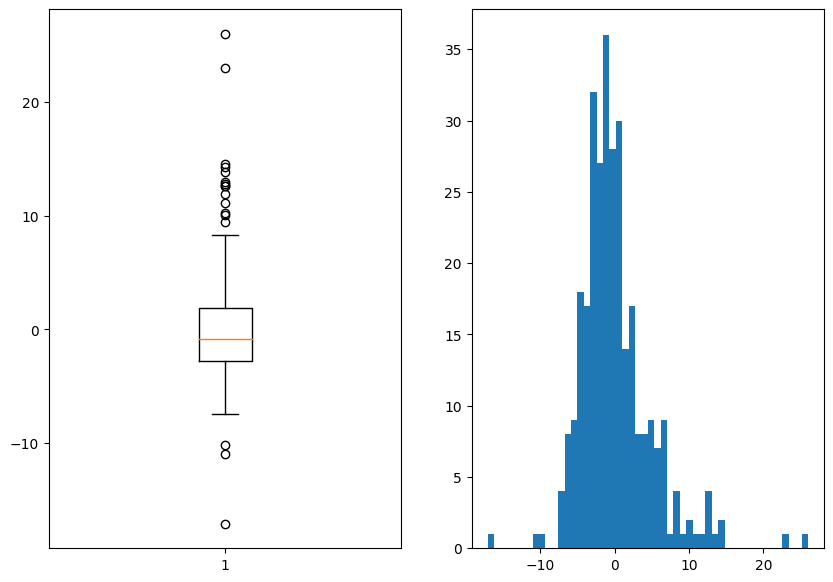

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,7))
ax1.boxplot(results.resid)
ax2.hist(results.resid, bins = 50)
plt.show()
# hay outliers residuales por no haber limpiado apropiadamente en los datos originales
# entonces los resultados tenradn outliers
# los residuales no cumplen con la distribuciuon normal , los residuales despues de 20 no son parte de la curva normal

Ahora debemos ver como se comportan los valores AJUSTADOS versius los PREDICHOS

In [ ]:
y_pred = results.predict(sm.add_constant(x_test))
print('Mean Squared Error (error medio comparando valores de tests y valores de prediccion):',mean_squared_error(y_test, y_pred))
# para ello usamos la mediana

Mean Squared Error (error medio comparando valores de tests y valores de prediccion): 21.832709989577552


21.83 esta cerca del 23.64 del otro mean squared, asi que el modelo no esta tan mal. Si lo graficamos son dos rectas cercanas, pero NO esta superpuestas cerca porque seria overfiting

In [ ]:
# CALCULAMOS ESTOS VALORES PAR APODER HACER GRAFICOS IMPORTANTES PARA EL ANALSIS
# Valores ajustados
fitted_values = results.fittedvalues

# valores residuales
residuals = results.resid

# residuales estadarizados
lm_resid_stand = results.get_influence().resid_studentized_internal

# raiz de los residuales normalizados absolutos
lm_resid_norm_abs_sqrt = np.sqrt(np.abs(lm_resid_stand))

# residuales absolutos
lm_resid_norm_abs = np.abs(residuals)

sns.set(rc = {'figure.figsize':(15,8)})

In [ ]:
y.drop(y[y['MDEV']>=40].index, inplace=True)
# se elimina con drop


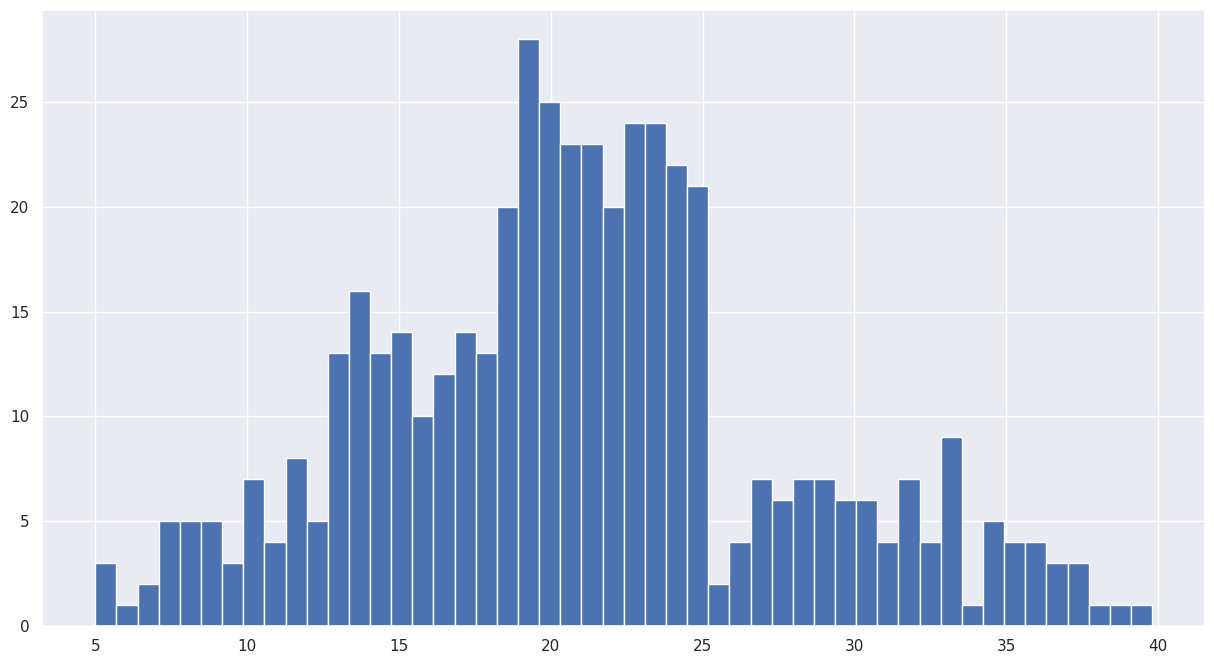

In [ ]:
plt.hist(y, bins=50)
plt.show()

In [ ]:
# se agrega drop para eliminar columnas,
# se crea features_name_2 que contenga solo los nombres del arreglo, sin los eliminados
# en el codigo reemplazar features_name por features_name_2
x.drop(["INDUS", "AGE", "NOX"], axis='columns', inplace=True)
features_name_2 =['CRIM', 'ZN', 'CHAS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [ ]:
print(f"Coeficiente de determinación: {results.rsquared}")

print(f"Coeficiente de determinación ajustado: {results.rsquared_adj}")

print(f"Mean Squared Error: {results.mse_resid}")


Coeficiente de determinación: 0.747199884740759
Coeficiente de determinación ajustado: 0.7358282532585094
Mean Squared Error: 23.64922695853935


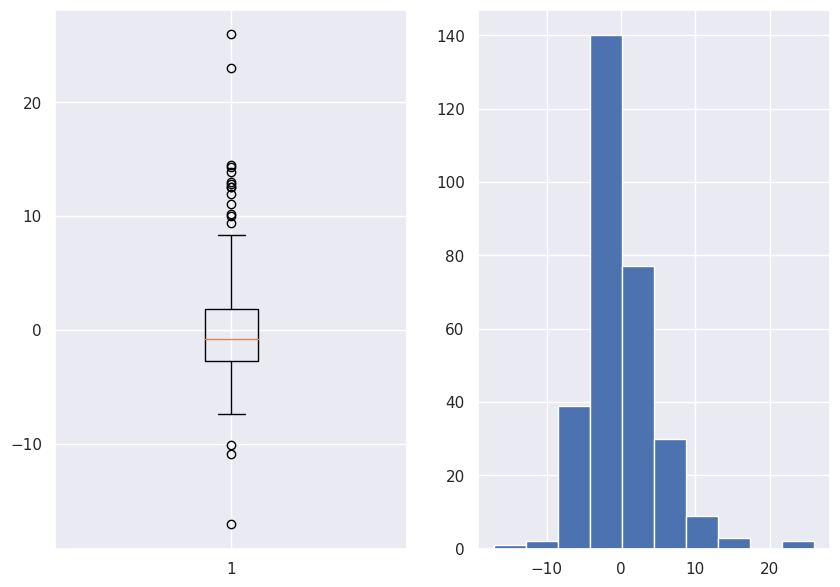

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(10,7))
ax1.boxplot(results.resid)
ax2.hist(results.resid)
plt.show()

In [ ]:
y_pred = results.predict(sm.add_constant(x_test))



In [ ]:
print(mean_squared_error(y_test, y_pred))

21.832709989577552


In [ ]:
# Valores ajustados
fitted_values = results.fittedvalues

# valores residuales
residuals = results.resid

# residuales estadarizados
lm_resid_stand = results.get_influence().resid_studentized_internal

# raiz de los residuales normalizados absolutos
lm_resid_norm_abs_sqrt = np.sqrt(np.abs(lm_resid_stand))

# residuales absolutos
lm_resid_norm_abs = np.abs(residuals)

sns.set(rc = {'figure.figsize':(10,6)})


# **RESIDUALES HISTOGRAMA**

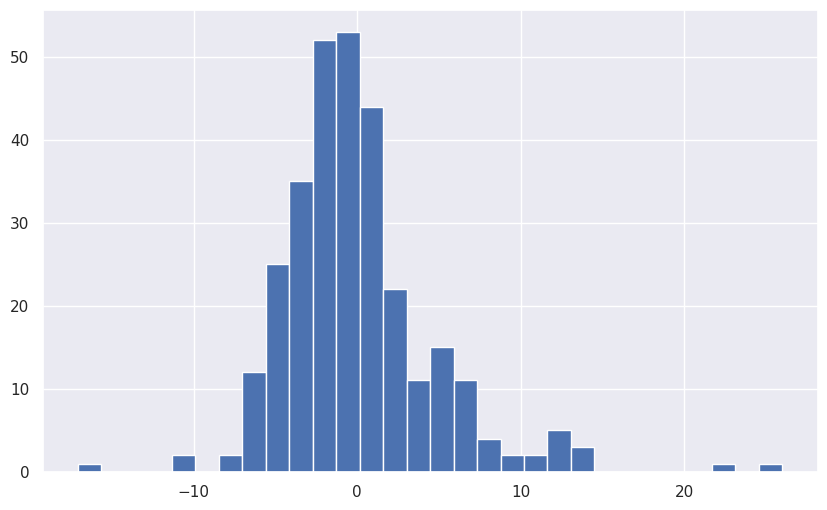

In [ ]:
# volvemos a graficar el residual , si o si hay que entender los graficos anteriores
plt.hist(results.resid, bins = 30)
plt.show()

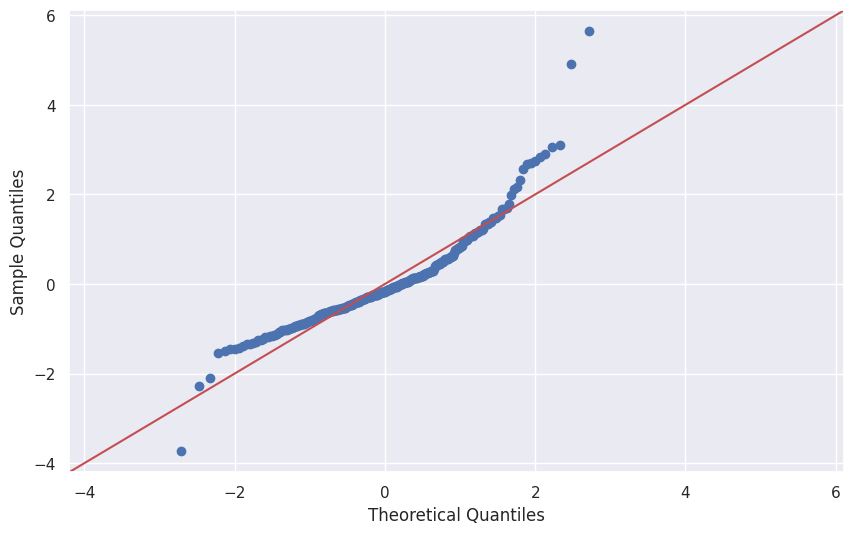

In [ ]:
fig = sm.qqplot(lm_resid_stand, line='45')
# uso qqplot para graficar con la libreria stat models
# le envio los valores estandarizados calculados y grafico una linea de 45º
plt.show()


la mayoria de los puntos deberian ir pegados a la linea roja, hay un problema si hay pancitas y colas levantadas.
Lo primero que se observan son los outliers arriba a tal punto que me levantan la regresion y abajo tambine outliers separados de la regresion, algo esta pasando con estos datos, tienen problemas.

# **VALORES RESIDUALES VERSUS AJUSTADOS**

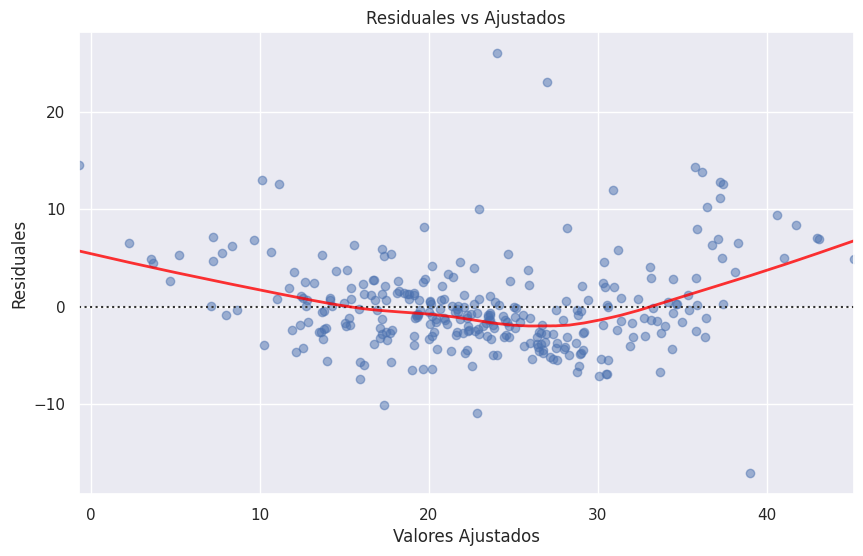

In [ ]:
plot = sns.residplot(x=fitted_values, y=residuals, lowess=True,
                     scatter_kws={'alpha':0.5},
                     line_kws={'color':'red', 'lw':2, 'alpha':0.8})
# Titel  and labels
plot.set_title('Residuales vs Ajustados')
plot.set_xlabel('Valores Ajustados')
plot.set_ylabel('Residuales');

El grafico debe tener puntos aleatorios, sin patrones, el promedio de la grafica residual debe acercarse a 0. ver la s tendencias segun las 6 slides de teoria

Hay outliers arriba y abajo.  
La varianza es constante mas o menos? No debe haber outliers que perturben la distribucion. hay una concentracion de puntos que se levantan en las puntas y pueden ser tambien outliers. Enlas graficas caja vimos que hay muchos outliers.
Quizas limpiando los outliers o ptos influyentes, quizas la curva pronunciada ya no aparece. No queda nunca una recta

En la distribucion Normal y en el qqplot ya vimos  que hay outliers!

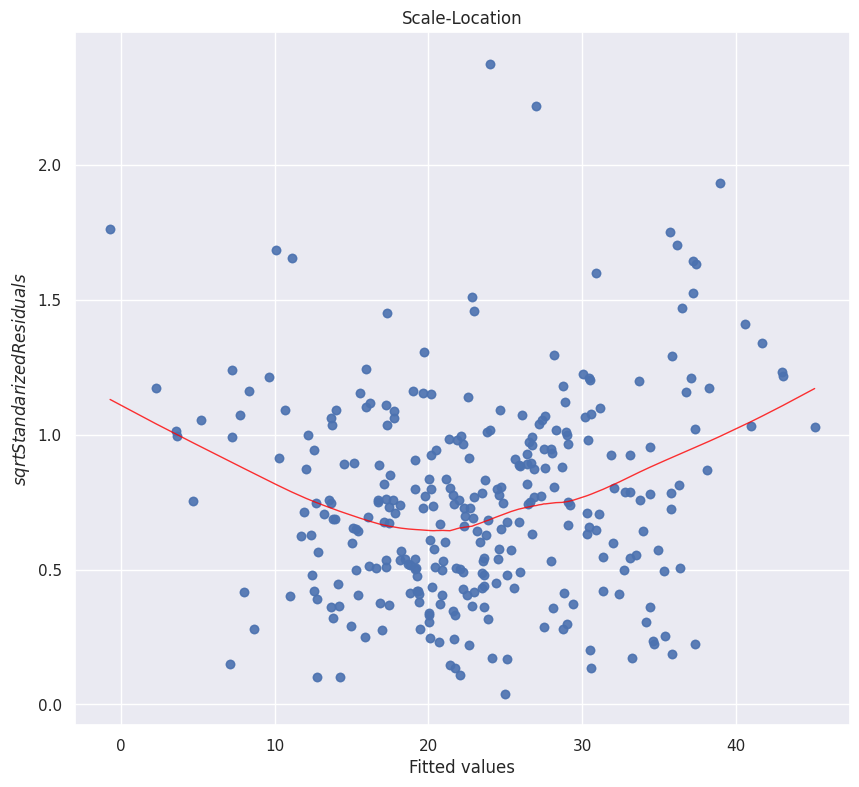

In [ ]:
plot_lm_3 = plt.figure(figsize=(10,9))
plt.scatter(fitted_values, lm_resid_norm_abs_sqrt, alpha=0.5);
sns.regplot(x = fitted_values.values, y = lm_resid_norm_abs_sqrt,
            scatter=True,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw':1, 'alpha': 0.8});
#sns.regplot(x=(fitted_values, lm_resid_norm_abs_sqrt), scatter=False, ci=False, line_kws={'color': 'red', 'lw':1, 'alpha': 0.8});
# sns.regplot(x="total_bill", y="tip", data=tips, scatter=True, color="g", marker="o", line_kws={'color': 'red', 'lw':1, 'alpha': 0.8})
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$sqrt{Standarized Residuals}$');


Scale location deberia mostrar una varianza igual, pero hay una enorme dispersion de puntos, hay que trabajar esos puntos
Se podria hacer otro grafico de Residual vs LevelSplot pero ya tiene suficientes insights como:
- scale location no da las premisas
- residual vs ajustados tiene esos problemas
- qqplot tiene problemas
- los residuales vs ajustados tiene una mala distribucion
Tenemos los VALORES DE REFERENCIA
- Valores predichos y valores de prueba : 21.8927 se diferencia apenas 3 puntos con Valor MSE de los residuales: 23.6492

In [ ]:
# annotations
abs_sq_norm_resid = np.flip(np.argsort(lm_resid_norm_abs_sqrt),0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_sq_norm_resid_top_3:
  plot_lm_3.axes[0].annotate(i,
                             xy=(fitted_values[i],
                                 lm_resid_norm_abs_sqrt[i]));
  plt.show()


KeyError: ignored